# Class Demo
# Linear Models

In [1]:
# Load the following libraries
import pandas
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
# reading the csv file
internet_dataframe = pandas.read_csv("internet.csv")

In [4]:
# save independent values in X and dependent in y
X = internet_dataframe[['Hour','Users']]
y = internet_dataframe['Speed']

<Axes: xlabel='Hour', ylabel='Users'>

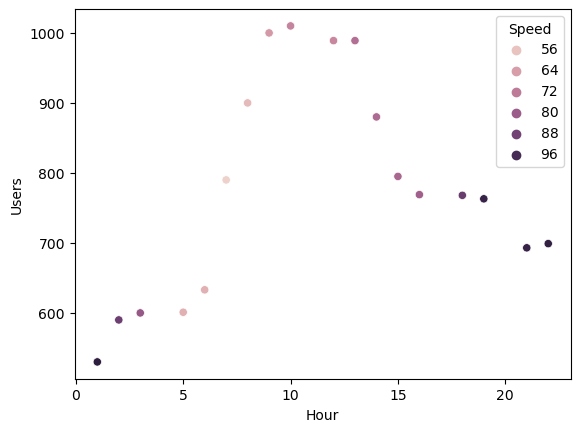

In [5]:
sns.scatterplot(x=internet_dataframe['Hour'], y=internet_dataframe['Users'], hue=internet_dataframe['Speed'] )

In [6]:
# create the regression model object and fit the data into it
reg_obj = linear_model.LinearRegression()

# Train the model by calling fit() method
reg_obj.fit(X,y)

LinearRegression()

In [7]:
# predict the speed at 20:00 hours in the evening and with 750 users online
predicted_speed = reg_obj.predict([[20, 750]])
print("Predicted Speed : ")
print(predicted_speed)

Predicted Speed : 
[92.14512274]


In [8]:
# Display the coefficients
print(reg_obj.coef_)

[ 1.43474145 -0.05909483]


In [9]:
# Calculate R^2 score for Linear Regression
print("Test set R^2 score: {:.2f}".format(reg_obj.score(X, y)))

# Calculate the mean square error
mean_squared_error = np.mean((predicted_speed - y)**2)

# Display the mean square error
print("Mean Squared Error on test set", mean_squared_error)

Test set R^2 score: 0.49
Mean Squared Error on test set 436.52176052200036


# Predictions of a linear model on the wave dataset

In [10]:
# import the libraries for LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn

ModuleNotFoundError: No module named 'mglearn'

In [ ]:
# X and y are the array variables that store the independent and dependent variables
X, y = mglearn.datasets.make_wave(n_samples = 60)

# Call the train_test_split method to split the data and the default splitting is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
# Display the coefficient and intercept values
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

In [ ]:
# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

* As R^2 of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting.
* For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting.

In [ ]:
# import pandas data set
import pandas as pd

# Load the dataset into dataframe (df) from the UCI link 
df_Boston = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')

# Assign the names to the columns of the dataset
df_Boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Display first 5 records
df_Boston.head()

In [ ]:
# Extract the features (X) and target (y)
X = df_Boston.iloc[:, 0:13].values
y = df_Boston.iloc[:, -1].values

# Display independent and dependent variables
print(X.shape, y.shape)

In [ ]:
# import the libraries for LinearRegression
from sklearn.model_selection import train_test_split

# Call the train_test_split method to split the data and the splitting is 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 98)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression

# Train the LinearRegression mode by using a method fit() function/ method
regression = LinearRegression().fit(X_train, y_train)

In [ ]:
print("Training set score: {:.2f}".format(regression.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regression.score(X_test, y_test)))

## Reducing Variance with Regularization
### Problem
We want to reduce the variance of your linear regression model

### Solution
Use a learning algorithm that includes a *shrinkage penalty* (also called **regularization**) like ridge regression and lasso regression:

### Discussion
In standard linear regression, the model trains to minimize the sum of squared error between the true($y_i$) and prediction ($\hat y_i$) target values, or residual sum of squares (RSS):
$$
RSS = \sum_{i=1}^n{(y_i - \hat y_i)^2}
$$

Regularized regression learners are similar, except they attempt to minimize RSS and some penalty for the total size of the coefficient values, called a shrinkage penalty because it attempts to "shrink" the model. There are two common types of regularized learners for linear regression: ridge regression and the lasso. The only formal difference is the type of shrinkage penalty used. In ridge regression, the shrinkage penalty is a tuning hyperparameter multiplied by the squared sum of all coefficients:
$$
RSS+\alpha \sum_{j=1}^p{\hat \beta_j^2}
$$

where $\hat \beta_j$ is the coefficient of the jth of p features and $\alpha$ is a hyperparameter (discussed next). The lasso is similar, except the shrinkage penalty is a tuning hyperparmeter multiplied by the squared sum of all coefficients:
$$
\frac{1}{2n} RSS + \alpha \sum_{j=1}^p{|\beta_j|}
$$

where n is the number of observations. So which one should we use? A a very general rule of thumb, ridge regression often produces slightly better predictions than lasso, but lasso produces more interpretable models. If we want a balance between, ridge and lasso's penalty functions we can use elastic net, which is simply a regression model with both penalties included. Regardless of which one we use, bot hridge and lasso regresions can penalize large or complex models by including coefficient values in the loss funciton we are trying to minimize

The hyper parameter $\alpha$ lets us control how much we penalize the coefficients, with higher values of $\alpha$ creating simpler models. The ideal value of $\alpha$ should be tuned like any other hyperparameter. In scikit-learn, $\alpha$ is set using the alpha parameter.

scikit-learn includes a RidgeCV method that allows us to select the ideal value for $\alpha$:

In [ ]:
# import the libraries for LinearRegression
from sklearn.model_selection import train_test_split

# Call the train_test_split method to split the data and the splitting is 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 98)

In [ ]:
from sklearn.linear_model import Ridge

# Initialise the object
ridge = Ridge(alpha = 150)

# Train the model by calling the method fit()
model_ridge = ridge.fit(X_train, y_train)

# Display the coefficients of the model
model_ridge.coef_

In [ ]:
print("Training set score: {:.2f}".format(model_ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_ridge.score(X_test, y_test)))

One final note: because in linear regression the value of the coefficients is partially determined by the scale of the feature, and in regularized models all coefficients are summed together, we must make sure to standardize the feature prior to training

### Reducing Features with Lasso Regression
#### Problem
You want to simplify your linear regression model by reducing the number of features.

#### Solution
Use a lasso regression

In [ ]:
# Load the libraries
from sklearn.linear_model import Lasso

# import the libraries for LinearRegression
from sklearn.model_selection import train_test_split

# Call the train_test_split method to split the data and the splitting is 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 98)

In [ ]:
# Delcare and initialise a model using a method Lasso()
regression = Lasso(alpha = 2)

# Train the model by calling a method named as "fit"
Lasso = regression.fit(X_train, y_train)

In [ ]:
Lasso.coef_

However if we increase $\alpha$ to a much higher value, we see that lierally none of the features are being used:

In [ ]:
print("Training set score: {:.2f}".format(Lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Lasso.score(X_test, y_test)))

The practical benefit of this effect is that it means that we could include 100 features in our feature matrix and then, through adjusting lasso's $\alpha$ hyperparameter, produce a model that uses only 10 (for instance) of the most important features. This lets us reduce variance whiel improving interpretability of our model (since fewer features is easier to explain)

## ElasticNet ML Model

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialise an object (e_bet) by calling a method ElasticNet()
e_net = ElasticNet(alpha = 0.1)

# Train the model by calling a fit() method
model_Elastic = e_net.fit(X_train, y_train)

# Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)

# Calculate the mean square error
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)

# Display the mean square error
print("Mean Squared Error on test set", mean_squared_error)

In [ ]:
print("Training set score: {:.2f}".format(model_Elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_Elastic.score(X_test, y_test)))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [ ]:
import matplotlib.pyplot as plt

linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

## Reference: 
* Chapter 2, Introduction to Machine Learning with Python A Guide for Data Scientists, Andreas C. Müller and Sarah Guido, Copyright © 2017, O'Reilly.
* <p>https://machinelearningmastery.com/elastic-net-regression-in-python/</p>
